<a href="https://colab.research.google.com/github/Ashu156/JLab/blob/main/JL_Linear_track_reward_rate_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install mplcyberpunk
import numpy as np 
import pandas as pd
import io
import mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Sheet1')
print(df)

Saving Reward rates.xlsx to Reward rates (1).xlsx
    XFN1  XFN2  XFN3  XFN4
0   0.53  0.63  0.78  1.00
1    NaN   NaN   NaN   NaN
2    NaN   NaN   NaN   NaN
3   0.76  0.90  1.05  0.62
4   1.25  1.10  1.45  1.48
5   1.96  1.58  1.79  2.10
6   2.05  2.57  1.40  2.26
7   1.57  0.67  2.24  3.17
8   3.30  3.00  1.65  3.10
9   3.36  2.65  2.14  3.85
10   NaN   NaN   NaN   NaN
11   NaN   NaN   NaN   NaN
12  4.86  4.15  2.81  3.80
13  2.71  3.35  3.10  4.40


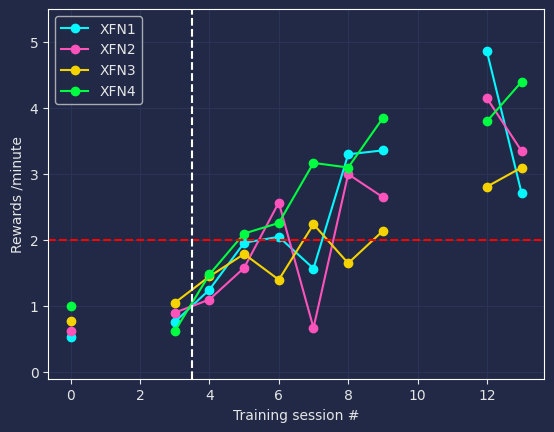

In [14]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]
fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.1, 5.5])
ax.set_xlabel('Training session #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

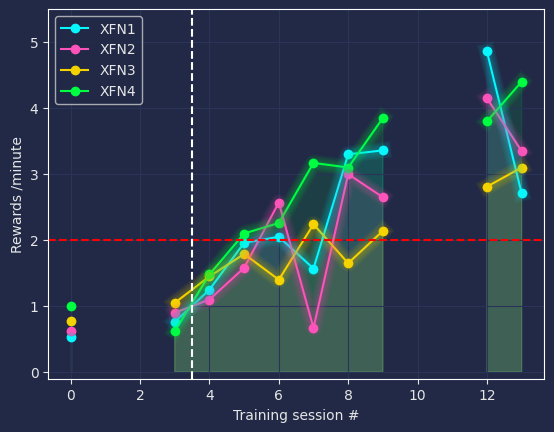

In [15]:
fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)
# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)
# Color the areas below the lines:
for column, color in zip(df, colors):
    ax.fill_between(x=df.index,
                    y1=df[column].values,
                    y2=[0] * len(df),
                    color=color,
                    alpha=0.1)
    
ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.1, 5.5])
ax.set_xlabel('Training session #')
ax.set_ylabel('Rewards /minute')

ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

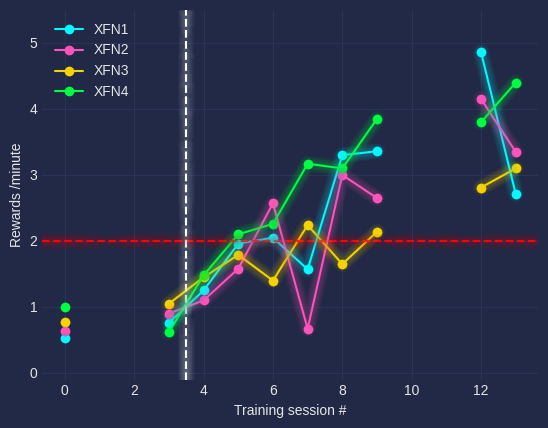

In [34]:
plt.style.use("cyberpunk")
fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.1, 5.5])
ax.set_xlabel('Training session #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

mplcyberpunk.make_lines_glow(ax)

In [32]:
df2 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Sheet2')
df3 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Sheet3')
# average = df2.iloc[[0]]
# print(average)
# yerr1 = df2.iloc[[1]]
# print(yerr1)
# yerr2= yerr1.iloc[:, ::-1]
# print(yerr2)

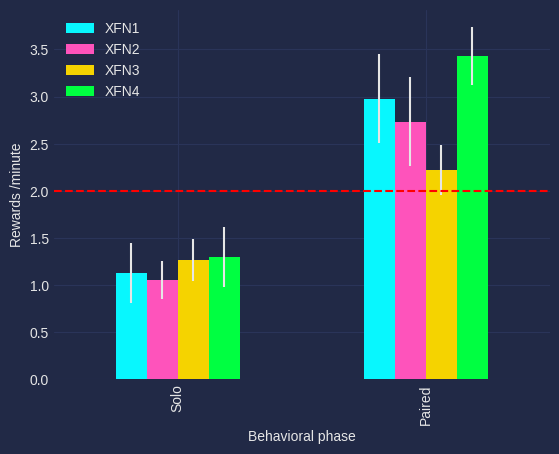

In [33]:
# plt.style.use("dark_background")
ax = df2.plot(kind='bar', yerr = df3, align='center')

# ax.grid(color='#2A3459')
# ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
# ax.set_ylim([-0.1, 5.5])
ax.set_xlabel('Behavioral phase')
ax.set_ylabel('Rewards /minute'), 
ax.set_xticklabels(['Solo', 'Paired'])
ax.axhline(2.0, linestyle='--', color = 'red')